In [1]:
import sys
sys.path.insert(0, '../')
import myTA
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from strategies import Backtesting, MACDZeroHistPrediction, downloadAndMakeAnalysis, sharpe_ratio

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


result $18.66
mean deali return: 0.03886779149373372 % 
std: 0.23798574918652057 %
sharpe ratio: 2.167922718003956


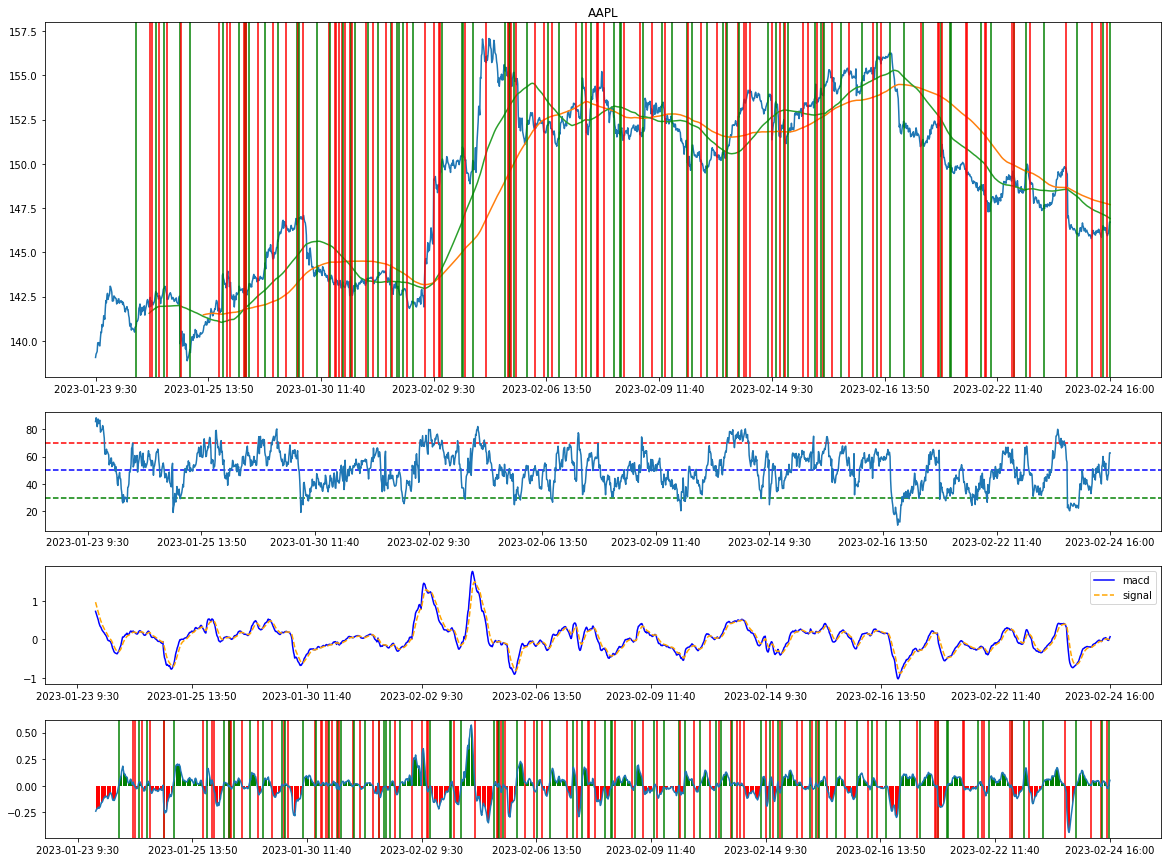

In [13]:
ticker = 'AAPL'
start = dt.datetime(2023,1,23)
end = dt.datetime.now()
interval = '5m'

strategy = MACDZeroHistPrediction(4, ticker, start, end, interval, fastperiod = 12, slowperiod = 26, signalperiod = 9)
data = downloadAndMakeAnalysis(strategy)
strategy.getBackTestSignals(data)

bt = Backtesting(2000, strategy)
bt.calculateProfit()

print(f"sharpe ratio: {sharpe_ratio(bt.resturnsdfDaily['ROI_change'].values, risk_free_rate=3.95)}")
myTA.plotAnalysis(data, ticker, strategy.trades)

result $-5.47
mean deali return: -0.002279383341471354 % 
std: 0.057961766004492224 %
sharpe ratio: -2.3680513524691302


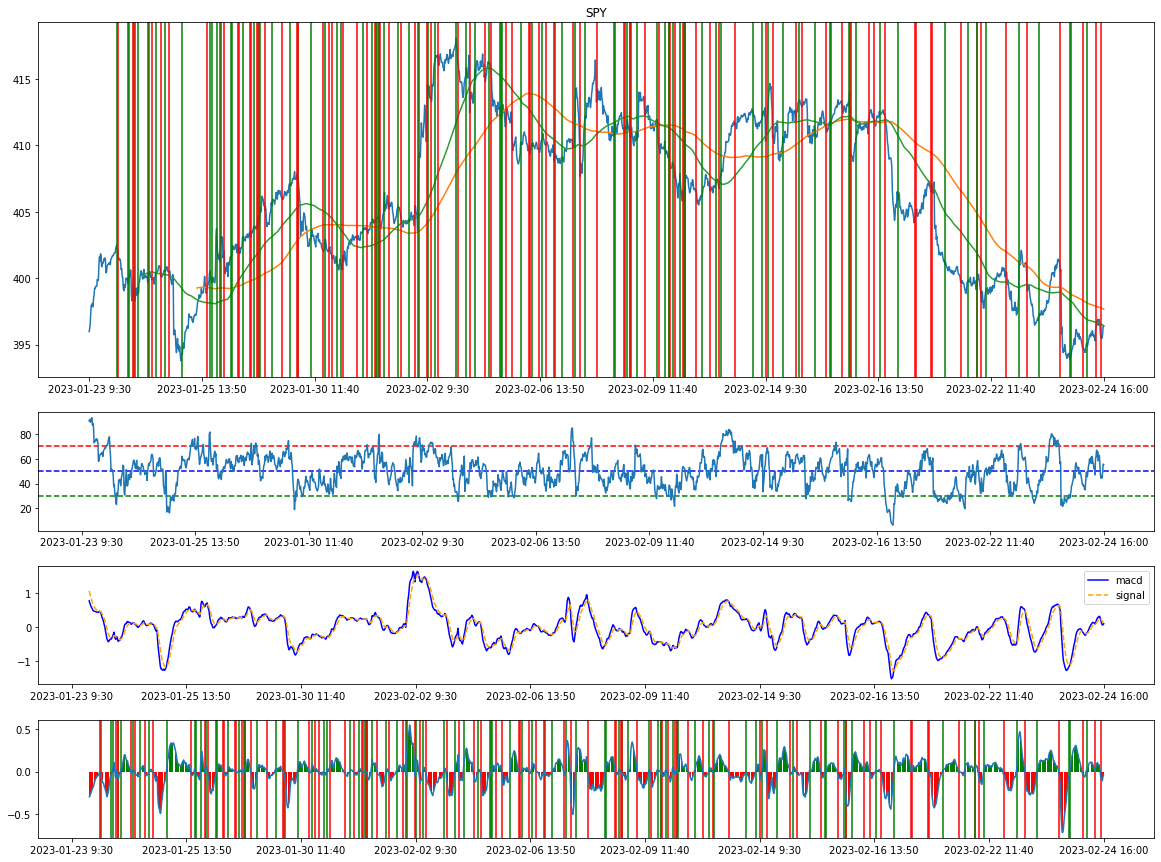

In [10]:
ticker = 'SPY'
start = dt.datetime(2023,1,23)
end = dt.datetime.now()
interval = '5m'

strategy = MACDZeroHistPrediction(5, ticker, start, end, interval, fastperiod = 13, slowperiod = 25, signalperiod = 9)
data = downloadAndMakeAnalysis(strategy)
strategy.getBackTestSignals(data)

bt = Backtesting(10000, strategy)
bt.calculateProfit()

print(f"sharpe ratio: {sharpe_ratio(bt.resturnsdfDaily['ROI_change'].values, risk_free_rate=3.95)}")
myTA.plotAnalysis(data, ticker, strategy.trades)

result $46.79
mean deali return: 0.027523507510914518 % 
std: 0.3481828747100445 %
sharpe ratio: 0.9645787064586009


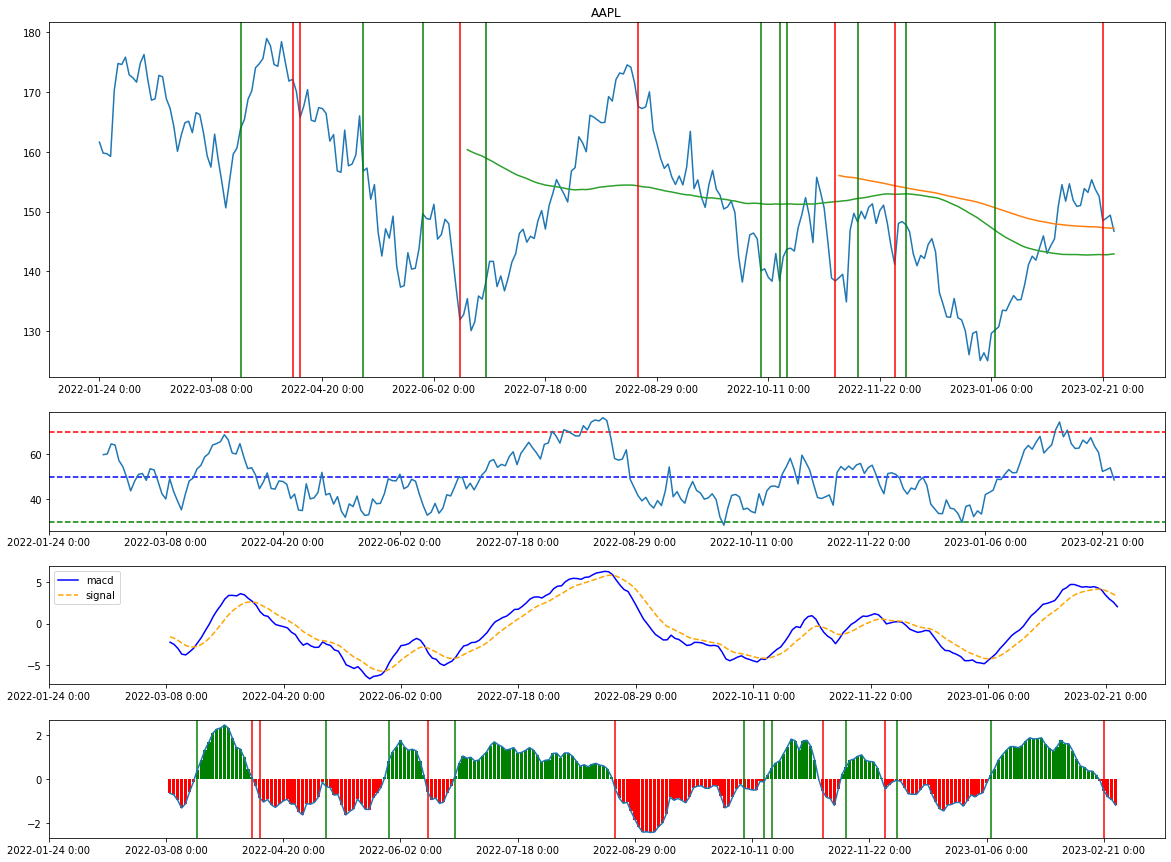

In [4]:
ticker = 'AAPL'
start = dt.datetime(2022,1,23)
end = dt.datetime.now()
interval = '1d'

strategy = MACDZeroHistPrediction(3, ticker, start, end, interval, fastperiod = 11, slowperiod = 24, signalperiod = 9)
data = downloadAndMakeAnalysis(strategy)
strategy.getBackTestSignals(data)

bt = Backtesting(10000, strategy)
bt.calculateProfit()

print(f"sharpe ratio: {sharpe_ratio(bt.resturnsdfDaily['ROI_change'].values, risk_free_rate=3.95)}")
myTA.plotAnalysis(data, ticker, strategy.trades)

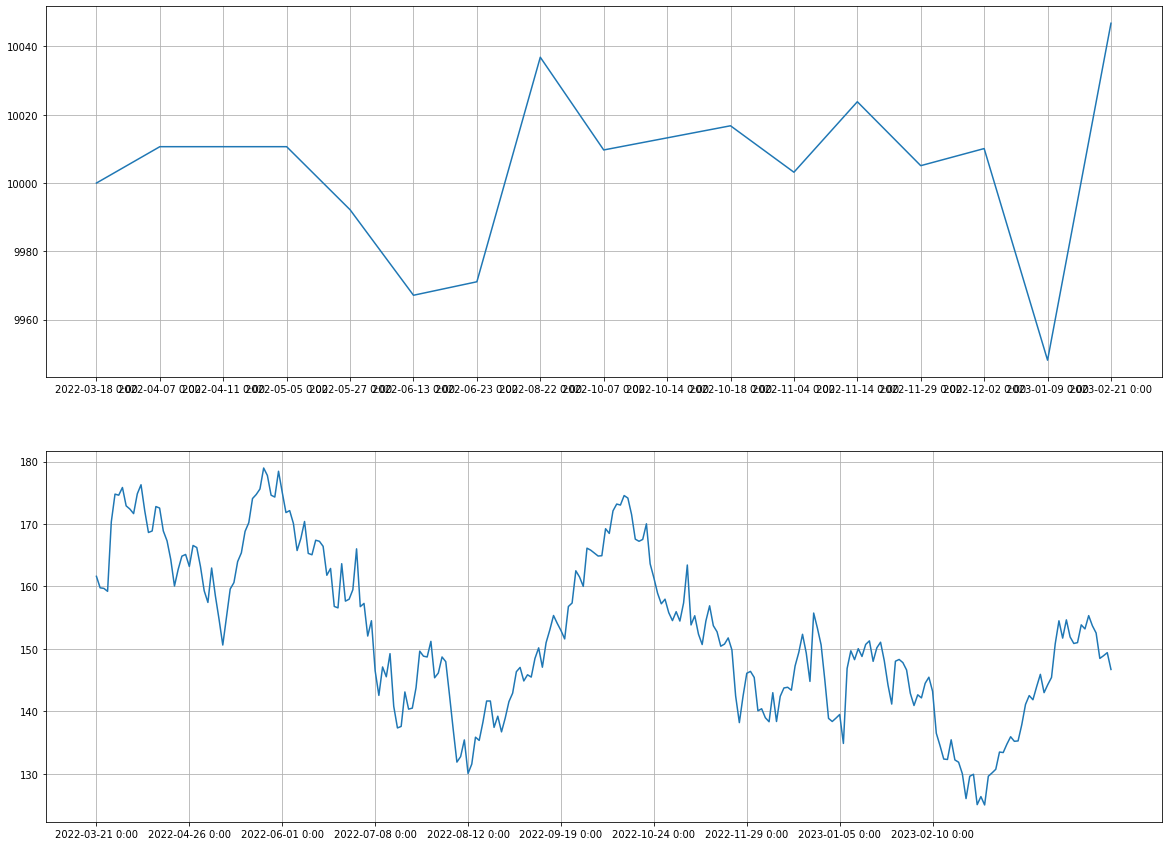

In [5]:
fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": [1,1]}, figsize=(20,15))

inedxes = np.arange(0,len(strategy.tradetimestamps), len(strategy.tradetimestamps) // 9)
ax[0].plot(bt.portfolio_value)
plt.sca(ax[0])
plt.xticks(inedxes, [str(strategy.tradetimestamps[i].date())+ " "+str(strategy.tradetimestamps[i].hour)+":"+str("%02d" % strategy.tradetimestamps[i].minute) for i in inedxes])
ax[0].grid()

plotdata = data[np.logical_and(data.index < strategy.tradetimestamps[-1], data.index > strategy.tradetimestamps[0])]
inedxes = np.arange(0, len(plotdata), len(plotdata) // 9)
ax[1].plot(data['Close'].values)
plt.sca(ax[1])
plt.xticks(inedxes, [str(plotdata.index[i].date())+ " "+str(plotdata.index[i].hour)+":"+str("%02d" % plotdata.index[i].minute) for i in inedxes])
ax[1].grid()